In [55]:
# Importing and basic utility cell
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
raw_Education = pd.read_excel('Education.xls',header = 4)
raw_PopulationEstimates = pd.read_excel('PopulationEstimates.xls',header = 2)
raw_PovertyEstimates = pd.read_excel('PovertyEstimates.xls',header = 3)
raw_Unemployment = pd.read_excel('Unemployment.xls',header = 9)


In [110]:
#filtered_by_state = raw_PopulationEstimates[raw_PopulationEstimates['Area_Name'].isin(states.values())]
filtered = raw_PopulationEstimates[['State',
                   'Area_Name',
                   'Economic_typology_2015',
                   'POP_ESTIMATE_2010',
                   'R_INTERNATIONAL_MIG_2011',
                   'R_INTERNATIONAL_MIG_2012',
                   'R_INTERNATIONAL_MIG_2013',
                   'R_INTERNATIONAL_MIG_2014',
                   'R_INTERNATIONAL_MIG_2015',
                   'R_INTERNATIONAL_MIG_2016']]
        
    
filtered
                        

,State,Area_Name,Economic_typology_2015,POP_ESTIMATE_2010,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016
0,US,United States,NaN,309348193,2.750744,2.875599,2.773619,3.080812,3.242191,3.102874
1,AL,Alabama,NaN,4785492,1.004861,0.976510,0.866524,0.978425,1.053925,0.975181
2,AL,Autauga County,0.0,54742,0.327282,0.036271,0.036424,0.109320,0.145439,0.126753
3,AL,Baldwin County,5.0,183199,0.989585,0.933548,1.084165,1.210458,1.274059,1.178888
4,AL,Barbour County,3.0,27348,-0.146322,-0.367256,-0.332902,-0.297946,-0.226274,-0.191443
5,AL,Bibb County,0.0,22861,0.438625,0.572927,0.575909,0.799787,0.798722,0.796390
6,AL,Blount County,0.0,57376,-0.052136,0.311745,0.502086,0.554751,0.624474,0.658693
7,AL,Bullock County,3.0,10892,1.758120,1.497006,0.847857,0.939496,0.850380,0.864678
8,AL,Butler County,0.0,20938,0.095726,0.240888,0.341505,0.393963,0.395951,0.398764
9,AL,Calhoun County,4.0,118468,0.330223,0.536298,0.222524,0.206619,0.250950,0.234889


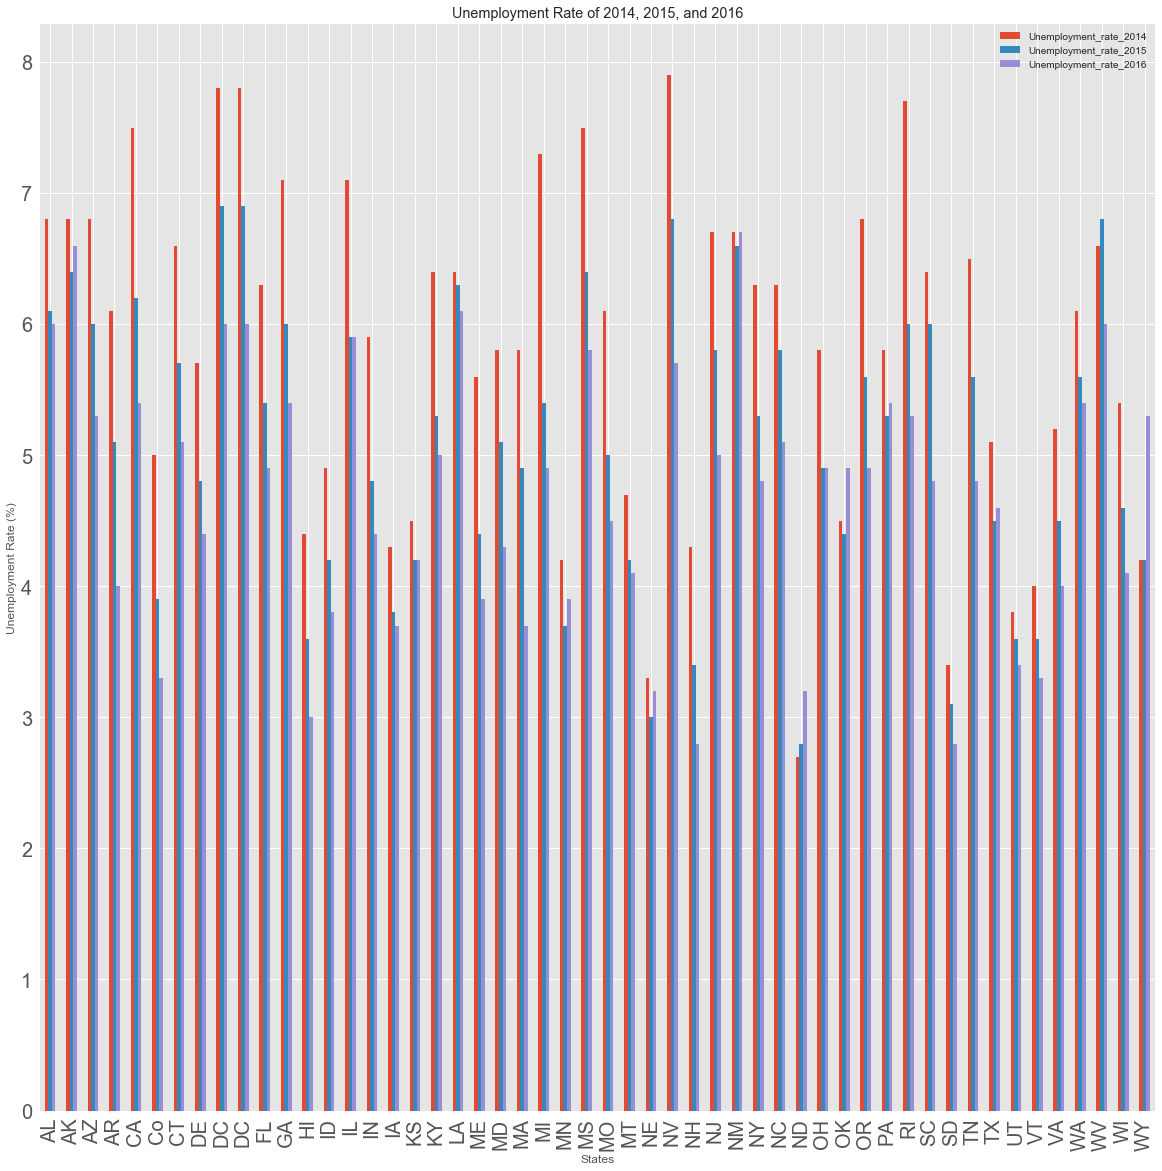

In [98]:
# Plotting unemployment rate for year 2014, 2015, 2016
filtered_by_state = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())].drop(['Rural_urban_continuum_code_2013','Urban_influence_code_2013','Metro_2013'],axis = 1)
unemployment_rate_2014_2015_2016 = filtered_by_state[['State',
                                                      'Unemployment_rate_2014',
                                                      'Unemployment_rate_2015',
                                                      'Unemployment_rate_2016']]
unemployment_rate_2014_2015_2016_plot = unemployment_rate_2014_2015_2016.plot.bar(figsize = (20,20),
                                               x = unemployment_rate_2014_2015_2016['State'],
                                               title = 'Unemployment Rate of 2014, 2015, and 2016',
                                               fontsize = 20)

unemployment_rate_2014_2015_2016_plot.set_ylabel('Unemployment Rate (%)')
unemployment_rate_2014_2015_2016_plot.set_xlabel('States')


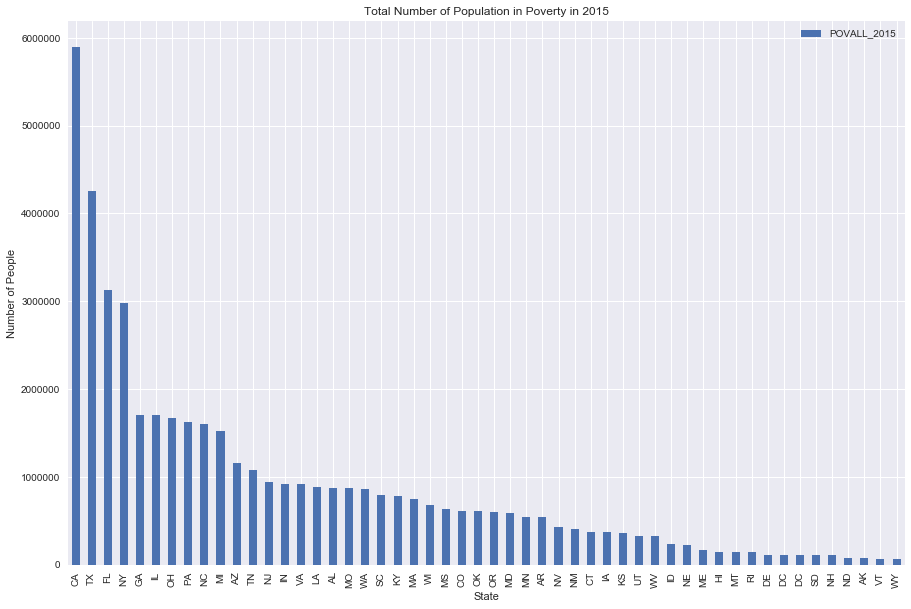

In [39]:
sort_by_states = raw_PovertyEstimates[raw_PovertyEstimates['Area_Name'].isin(states.values())]
cleaned_sort_by_states = sort_by_states.drop(sort_by_states.columns[[0,3,4,5,6,]],axis = 1)
selected = cleaned_sort_by_states[['State','POVALL_2015','CI90LBAll_2015','CI90UBALL_2015']].sort_values(by = "POVALL_2015",ascending = False)
pov_in_2015 = selected[['State','POVALL_2015']].plot(x = "State", kind = 'bar',figsize=(15,10),title = 'Total Number of Population in Poverty in 2015')
pov_in_2015.set_ylabel('Number of People')

In [1]:
print("Sara is here")

Sara is here
